In [1]:
#导入必要的库
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Activation, MaxPooling2D, Conv2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# 设置批量大小（每个批次的图像数量）和图像尺寸
BATCH_SIZE = 32
IMG_SIZE = (224, 224)

# 使用tf.keras.preprocessing.image_dataset_from_directory加载图像数据集
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory="../input/dog-vs-cat-classification/train/train",  # 数据集所在的目录
    shuffle=True,  # 是否在每个时期（epoch）之后随机打乱数据
    image_size=IMG_SIZE,  # 将图像调整为指定的尺寸
    batch_size=BATCH_SIZE  # 设置批量大小
)



Found 25000 files belonging to 2 classes.


In [3]:
#查看数据集中的类别名
train_data.class_names

['cats', 'dogs']

In [4]:
# 使用prefetch方法对训练数据集进行处理，以提高数据加载的效率
Train = train_data.prefetch(buffer_size=tf.data.AUTOTUNE)#会根据系统自动选择合适的缓冲区大小，以最大程度上提高性能

In [5]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

base_model.trainable = False

inputs = tf.keras.layers.Input(shape=(224, 224, 3), name='InputLayer')

x = base_model(inputs)

x = tf.keras.layers.GlobalAveragePooling2D(name="GlobalAveragePoolingLayer")(x)

outputs = tf.keras.layers.Dense(10, activation='softmax', name="OutputLayer")(x)

model_0 = tf.keras.Model(inputs, outputs, name='ImageClassifierModel')

model_0.compile(loss='sparse_categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_0 = model_0.fit(Train,
                        epochs=5,
                        validation_data=Train,
                        validation_steps=(0.25 * len(Train)))

16705208/16705208 [==============================] - 2s 0us/step
Epoch 1/5


2024-01-11 03:03:37.773845: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inImageClassifierModel/efficientnetb0/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


782/782 [==============================] - 58s 63ms/step - loss: 0.0819 - accuracy: 0.9809 - val_loss: 0.0255 - val_accuracy: 0.9933
Epoch 2/5
782/782 [==============================] - 48s 61ms/step - loss: 0.0255 - accuracy: 0.9916 - val_loss: 0.0201 - val_accuracy: 0.9949
Epoch 3/5
782/782 [==============================] - 47s 60ms/step - loss: 0.0195 - accuracy: 0.9937 - val_loss: 0.0178 - val_accuracy: 0.9951
Epoch 4/5
782/782 [==============================] - 47s 60ms/step - loss: 0.0185 - accuracy: 0.9938 - val_loss: 0.0155 - val_accuracy: 0.9959
Epoch 5/5
782/782 [==============================] - 48s 61ms/step - loss: 0.0178 - accuracy: 0.9937 - val_loss: 0.0143 - val_accuracy: 0.9965


In [6]:
#输出该模型的详细结构摘要
model_0.summary()

Model: "ImageClassifierModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (InputLayer)     [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 GlobalAveragePoolingLayer   (None, 1280)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 OutputLayer (Dense)         (None, 10)                12810     
                                                                 
Total params: 4062381 (15.50 MB)
Trainable params: 12810 (50.04 KB)
Non-trainable params: 4049571 (15.45 MB)
_________________________________________________________________


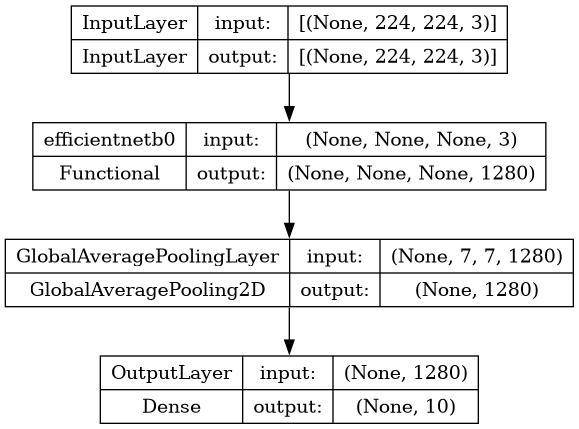

In [7]:
from tensorflow.keras.utils import plot_model

# 绘制模型结构图，并显示每个层的输入和输出形状
plot_model(model_0, show_shapes=True)


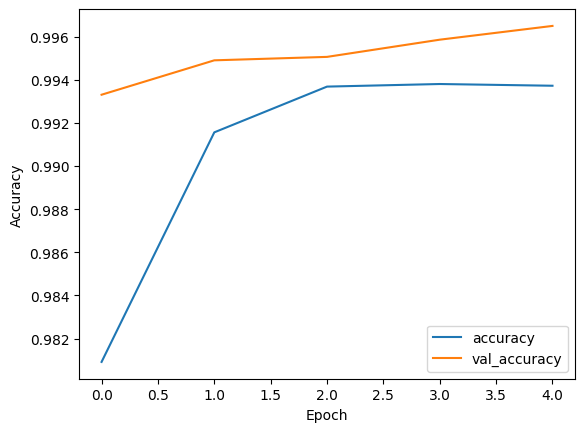

In [8]:
#绘制模型训练过程中的准确度曲线
plt.plot(history_0.history['accuracy'], label='accuracy')
plt.plot(history_0.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right');

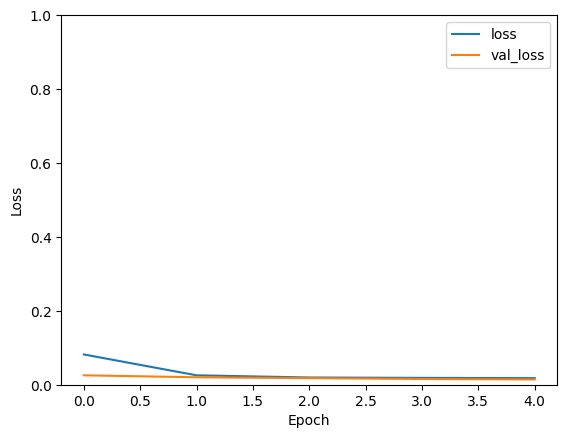

In [9]:
#绘制模型训练过程中的损失曲线
plt.plot(history_0.history['loss'], label='loss')
plt.plot(history_0.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.0, 1])
plt.legend(loc='upper right');

Image to predict 
Actual label:  cats
1/1 [==============================] - 2s 2s/step
Predicted label:  cats


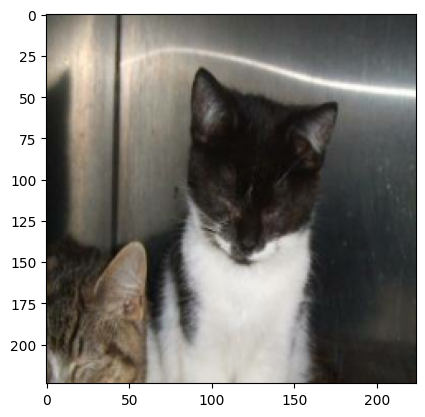

In [10]:
# 从Train数据集中获取第一个批次的图像和标签
for img_batch, labels_batch in Train.take(1):
    
    # 取第一张图像并转换为NumPy数组（astype('uint8')是为了正确显示图像）
    first_img = img_batch[0].numpy().astype('uint8')
    
    # 取第一张图像的实际标签
    first_label = labels_batch[0].numpy()
    
    # 输出信息
    print('Image to predict ')
    
    # 显示第一张图像
    plt.imshow(first_img)
    
    # 输出实际标签
    print('Actual label: ', train_data.class_names[first_label])
    
    # 对整个批次的图像进行预测
    batch_prediction = model_0.predict(img_batch)
    
    # 输出模型对第一张图像的预测结果
    print('Predicted label: ', train_data.class_names[np.argmax(batch_prediction[0])])


In [11]:
# 获取测试集中图像文件的文件名
test_filenames = os.listdir("../input/dog-vs-cat-classification/test/test")

# 创建包含文件名的DataFrame
test_df = pd.DataFrame({
    'id': test_filenames
})

# 使用ImageDataGenerator创建测试数据生成器
test_datagen = ImageDataGenerator()

# 从DataFrame创建测试数据生成器
test_generator = test_datagen.flow_from_dataframe(
    test_df,
    "../input/dog-vs-cat-classification/test/test",  # 测试图像所在的目录
    x_col='id',  # 文件名对应的列
    y_col=None,  # 不需要标签，因为这是测试集
    class_mode=None,  # 不需要类别信息
    target_size=IMG_SIZE,  # 将图像调整为指定的尺寸
    batch_size=BATCH_SIZE,  # 批量大小
    shuffle=False  # 不打乱数据，因为我们需要按顺序预测
)


Found 8000 validated image filenames.


In [12]:
# 对测试集进行预测
predict = model_0.predict(test_generator)

# 将预测结果的类别索引添加到测试数据的DataFrame中
test_df['labels'] = np.argmax(predict, axis=-1)

# 打印测试数据的DataFrame，包含文件名和预测结果
print(test_df)

# 将文件名设置为DataFrame的索引
test_df.set_index('id')

# 将DataFrame保存为CSV文件，index=False 表示不保存索引
test_df.to_csv('submission.csv', index=False)


250/250 [==============================] - 37s 142ms/step
              id  labels
0     005463.jpg       1
1     000304.jpg       1
2     001940.jpg       1
3     007289.jpg       1
4     005491.jpg       0
...          ...     ...
7995  004881.jpg       0
7996  003638.jpg       0
7997  007845.jpg       0
7998  007882.jpg       1
7999  004327.jpg       1

[8000 rows x 2 columns]
